# Cost and Regularization

## Learning Goals

* Summarize properties of the logistic function and the weight and bias parameters
* Compare and contrast cost functions for logistic regression models such as mean least squares and cross entropy
* Implement regularization terms in cost functions and tune regularization parameters
* Approximate optimal model parameters for logistic regression models using `sklearn`

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize as spo

## Logistic Regression 

Suppose we have $N$ data points $(x_0,y_0),\dots,(x_{N-1},y_{N-1})$ such that the targets are binary: $y_k = 0$ or $y_k = 1$ for $k=0,\dots,N-1$. The goal of **logistic regression** is to find parameters $W$ and $b$ such that $\sigma(x;W,b)$ "best fits" the data. Experiment with different values $W$ and $b$ to find a best fit line for the data below.

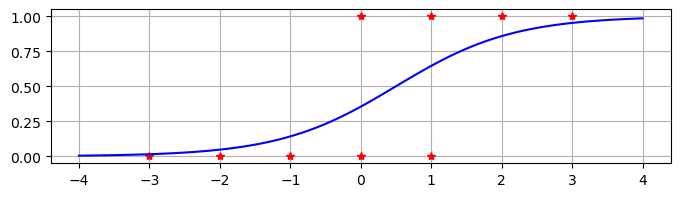

In [5]:
x = np.array([-3,-2,-1,0,0,1,1,2,3])
y = np.array([0,0,0,0,1,0,1,1,1])

W = 1.2
b = -0.6

sigma = lambda x: 1/(1 + np.exp(-(W*x + b)))
X = np.linspace(-4,4,100)
Y = sigma(X)

plt.figure(figsize=(8,2))
plt.plot(x,y,'r*',X,Y,'b'), plt.grid(True)
plt.show()

## Least Squares Cost Function

We need to define a cost function to find a line of "best fit". We say that a model $\sigma(x;W,b)$ **best fits** the data if the parameters **minimize the cost function**.

The **mean least squares** cost function is

$$
C_{LS}(W,b; x,y) = \frac{1}{N} \sum_{k=0}^{N-1} (y_k - \sigma(x_k; W,b) )^2
$$

Write a Python function called `costLS` which takes parameters `W`, `b`, `x` and `y`, and returns $C_{LS}(W,b; x,y)$.

In [2]:
sigma = lambda x,W,b: 1/(1 + np.exp(-(W*x + b)))
costLS = lambda W,b,x,y: 1/len(x)*np.sum((y - sigma(x,W,b))**2)

Use the function to compute the cost for the data in the previous example with $W=1.2$ and $b=-1$. Try to modify the parameters $W$ and $b$ to minimize the cost.

In [3]:
x = np.array([-3,-2,-1,0,0,1,1,2,3])
y = np.array([0,0,0,0,1,0,1,1,1])
costLS(1.2,-1,x,y)

0.12963850207631072

## Cross Entropy Cost Function

The **cross entropy** cost function:

$$
C_{CE}(W,b; x,y) = - \frac{1}{N} \sum_{k=0}^{N-1} \left( y_k \log(\sigma(x_k; W,b)) + (1 - y_k) \log(1 - \sigma(x_k; W,b))  \right)
$$

Write a Python function called `costCE` which takes parameters `W`, `b`, `x` and `y`, and returns $C_{CE}(W,b; x,y)$.

In [5]:
sigma = lambda x,W,b: 1/(1 + np.exp(-(W*x + b)))
costCE = lambda W,b,x,y: -1/len(y)*np.sum(y*np.log(sigma(x,W,b)) + (1 - y)*np.log(1 - sigma(x,W,b)))

Use the function to compute the cost for the data in the previous example with $W=3$ and $b=-1$. Try to modify the parameters $W$ and $b$ to minimize the cost.

In [7]:
x = np.array([-3,-2,-1,0,0,1,1,2,3])
y = np.array([0,0,0,0,1,0,1,1,1])
costCE(3,-1,x,y)

0.4340596605839115

## Regularization

Consider the following example:

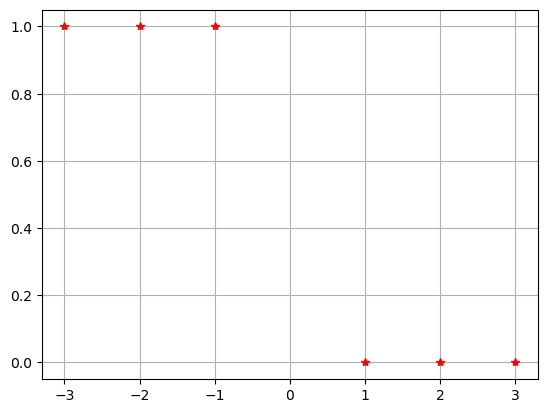

In [8]:
x = np.array([-3,-2,-1,1,2,3])
y = np.array([1,1,1,0,0,0])
plt.plot(x,y,'r*'), plt.grid(True)
plt.show()

Because the data is separated, we can take the limit $W \to \infty$ with $b=0$ to get the step function which perfectly matches the data. However there is not a unique solution since we could allow any $b$ such that $-W < b < W$. And also we don't want to consider infinite limits when doing mathematical computing.

In [9]:
W = -100
b = 50
costLS(W,b,x,y)

6.200126626701395e-45

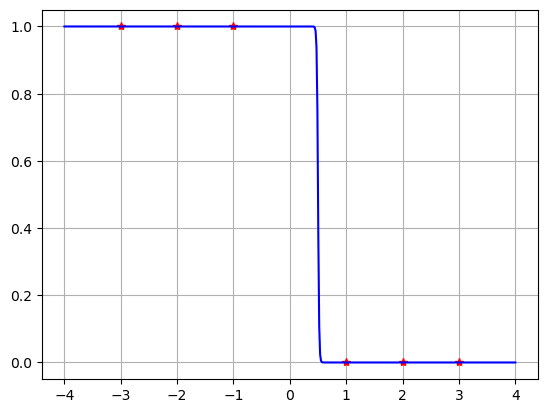

In [10]:
X = np.linspace(-4,4,500)
Y = sigma(X,W,b)
plt.plot(x,y,'r*',X,Y,'b'), plt.grid(True)
plt.show()

**Regularization** adds a penalty for large values of the weight parameter $W$. There are different ways to regularize such as $L^2$ regularization, $\alpha |W|^2$, and $L^1$ regularization, $\alpha |W|$, where $\alpha$ is the **regularization parameter**.

Write a Python function called `costCEL2` which takes parameters `W`, `b`, `x`, `y` and `alpha`, and returns the cross entropy cost function with $L^2$ regularization:

$$
C_{CE}(W,b; x,y) = - \frac{1}{N} \sum_{k=0}^{N-1} \left( y_k \log(\sigma(x_k; W,b)) + (1 - y_k) \log(1 - \sigma(x_k; W,b))  \right) + \alpha |W|^2
$$

In [11]:
costCEL2 = lambda W,b,x,y,alpha: -1/len(y)*np.sum(y*np.log(sigma(x,W,b)) + (1 - y)*np.log(1 - sigma(x,W,b))) + alpha*np.abs(W)**2

Use the function to compute the cost for the data in the previous example with $W=-10$ and $b=0$ and $\alpha = 10^{-6}$. Try to modify the parameters $W$ and $b$ to minimize the cost.

In [12]:
x = np.array([-3,-2,-1,1,2,3])
y = np.array([1,1,1,0,0,0])
W = -10.3
b = 0
costCEL2(W,b,x,y,1e-6)

0.00011730122027635695

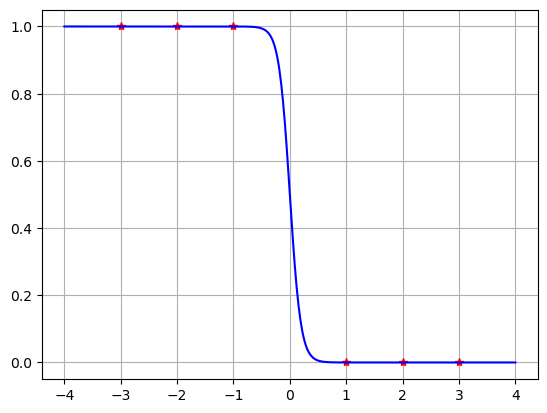

In [13]:
X = np.linspace(-4,4,500)
Y = sigma(X,W,b)
plt.plot(x,y,'r*',X,Y,'b'), plt.grid(True)
plt.show()

## Computing Parameters with SciPy

Next time we will develop the gradient descent method to compute optimal parameters for logistic regression. Today let's just use the function `scipy.optimize.minimize` takes a function $F(\mathbf{z}) : \mathbb{R}^n \rightarrow \mathbb{R}$ and initial value $\mathbf{z}_0$ can approximates a point $\mathbf{c} \in \mathbb{R}^n$ such that $F(\mathbf{c})$ is minimum.

In our case of fitting a logistic function to data using the cross entropy cost function with $L^2$ regularization, we input the function

$$
F(\mathbf{z}) = C_{CE,L^2}(W,b; \mathbf{x},\mathbf{y}; \alpha)
$$

where $\mathbf{z} = [W,b]$. Use `scipy.optimize.minimize` to compute the optimal parameters for the example above.

In [39]:
F = lambda z: z[0]**2 + z[1]**2
result = spo.minimize(F,[1,1])

In [40]:
result

  message: Optimization terminated successfully.
  success: True
   status: 0
      fun: 2.311471135620994e-16
        x: [-1.075e-08 -1.075e-08]
      nit: 2
      jac: [-6.600e-09 -6.600e-09]
 hess_inv: [[ 7.500e-01 -2.500e-01]
            [-2.500e-01  7.500e-01]]
     nfev: 9
     njev: 3

In [44]:
alpha = 0.1
F = lambda z: costCEL2(z[0],z[1],x,y,alpha)
spo.minimize(F,[1,1])

  message: Optimization terminated successfully.
  success: True
   status: 0
      fun: 0.2626698735210554
        x: [-1.031e+00 -2.064e-05]
      nit: 9
      jac: [ 1.006e-07 -2.302e-06]
 hess_inv: [[ 1.910e+00 -2.590e-03]
            [-2.590e-03  8.234e+00]]
     nfev: 30
     njev: 10

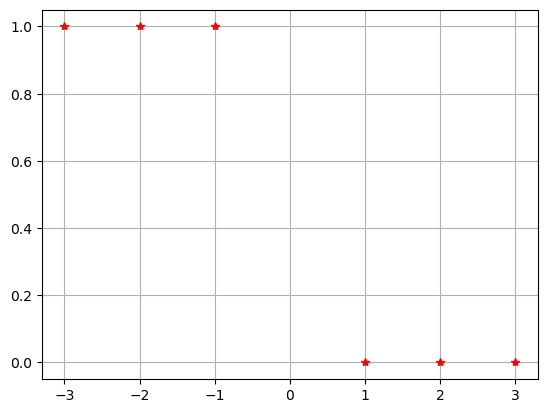

In [3]:
x = np.array([-3,-2,-1,1,2,3])
y = np.array([1,1,1,0,0,0])

plt.plot(x,y,'r*'), plt.grid(True)
plt.show()

In [54]:
x = np.array([-3,-2,-1,1,2,3])
y = np.array([1,1,1,0,0,0])
alpha = 1e-4
F = lambda z: costCEL2(z[0],z[1],x,y,alpha)
result = spo.minimize(F,[1,1])

In [55]:
W = result.x[0]
b = result.x[1]
print("W =",W,"b =",b)

W = -5.680856000623222 b = -0.0001634967358001213


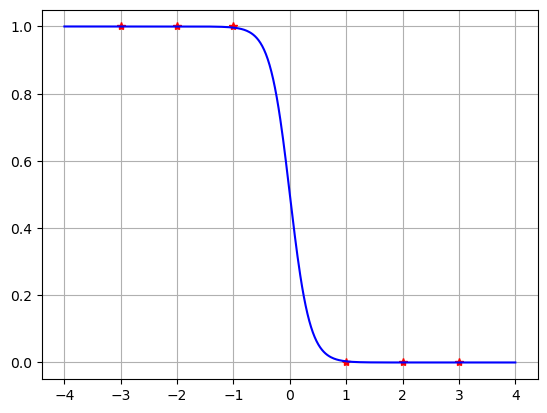

In [56]:
X = np.linspace(-4,4,500)
Y = sigma(X,W,b)
plt.plot(x,y,'r*',X,Y,'b'), plt.grid(True)
plt.show()